In [1]:
#Import Library
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Membaca Dataset dari file CSV yang sudah mengalami pembobotan
df = pd.read_csv('MID_21305144025.csv')

Eksplorasi dan Pemrosesan Awal Data

In [3]:
#Dengan menghapus kolom "Nama Kepala Keluarga" dan "No"
df.drop(columns=['Nama Kepala Keluarga','No'], inplace=True)

#Melihat beberapa baris pertama dari DataFrame
df.head()

,Pendapatan Rata-Rata,Jumlah Kendaraan,Kondisi Rumah,Jumlah Anggota Keluarga,Pendidikan Tertinggi
0,4,3,4,3,5
1,2,3,1,1,4
2,1,2,2,1,3
3,2,2,2,2,1
4,4,1,3,2,5


In [4]:
# Memeriksa Tipe Data 
df.dtypes

Pendapatan Rata-Rata       int64
Jumlah Kendaraan           int64
Kondisi Rumah              int64
Jumlah Anggota Keluarga    int64
Pendidikan Tertinggi       int64
dtype: object

In [5]:
#Memeriksa nilai yang hilang
df.isna().sum()

Pendapatan Rata-Rata       0
Jumlah Kendaraan           0
Kondisi Rumah              0
Jumlah Anggota Keluarga    0
Pendidikan Tertinggi       0
dtype: int64

In [6]:
#memeriksa deskripsi data
df.describe()

,Pendapatan Rata-Rata,Jumlah Kendaraan,Kondisi Rumah,Jumlah Anggota Keluarga,Pendidikan Tertinggi
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.000000,2.200000,2.533333,2.266667,3.533333
std,1.511858,1.014185,1.187234,1.032796,1.407463
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.500000,1.500000,1.500000,3.000000
50%,3.000000,2.000000,3.000000,2.000000,4.000000
75%,4.000000,3.000000,3.500000,3.000000,5.000000
max,5.000000,4.000000,4.000000,4.000000,5.000000


<Axes: >

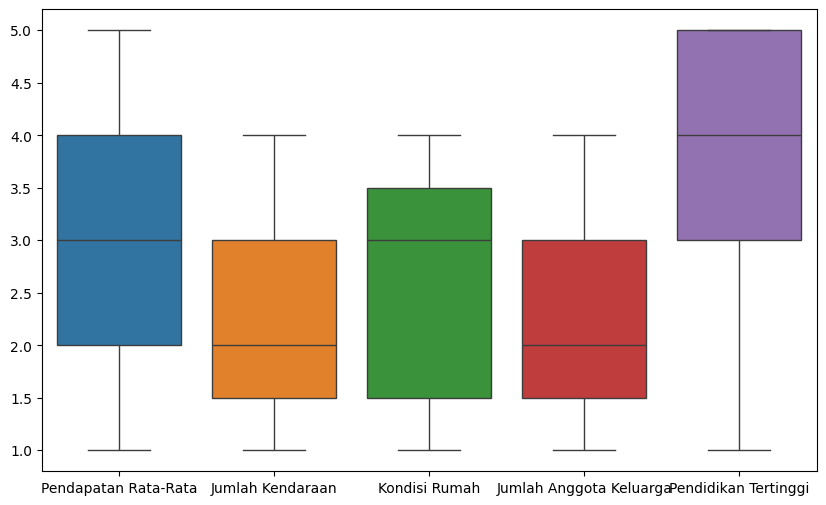

In [7]:
#Cek Outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)

Terapkan pengelompokan K-means

In [8]:
#melakukan clustering dengan K-Means
kMeans= KMeans(n_clusters=2, random_state=0)
cluster =kMeans.fit_predict(df)

#Menambahkan kolom hasil clustering 
df['Cluster']=kMeans.labels_


In [9]:
#Hasil Clustering
kMeans.labels_

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [10]:
#Menampilkan data cluster ke dataset
df

,Pendapatan Rata-Rata,Jumlah Kendaraan,Kondisi Rumah,Jumlah Anggota Keluarga,Pendidikan Tertinggi,Cluster
0,4,3,4,3,5,1
1,2,3,1,1,4,0
2,1,2,2,1,3,0
3,2,2,2,2,1,0
4,4,1,3,2,5,1
5,4,2,3,4,4,1
6,5,4,4,3,4,1
7,5,3,4,1,5,1
8,2,1,1,2,3,0
9,1,1,1,1,2,0


In [11]:
x= df.loc[df['Cluster']==1] #claster 1
y= df.loc[df['Cluster']==0] #claster 2
print('Banyak C1 yaitu',len(x)) #menampilkan jumlah cluster 1
print('Banyak C2 yaitu',len(y)) #menampilkan jumlah cluster 2

Banyak C1 yaitu 8
Banyak C2 yaitu 7


In [12]:
#Menampilkan claster 1
x

,Pendapatan Rata-Rata,Jumlah Kendaraan,Kondisi Rumah,Jumlah Anggota Keluarga,Pendidikan Tertinggi,Cluster
0,4,3,4,3,5,1
4,4,1,3,2,5,1
5,4,2,3,4,4,1
6,5,4,4,3,4,1
7,5,3,4,1,5,1
10,3,2,2,3,5,1
12,4,2,3,2,3,1
13,5,4,4,3,5,1


In [13]:
#Menampilkan claster 2
y

,Pendapatan Rata-Rata,Jumlah Kendaraan,Kondisi Rumah,Jumlah Anggota Keluarga,Pendidikan Tertinggi,Cluster
1,2,3,1,1,4,0
2,1,2,2,1,3,0
3,2,2,2,2,1,0
8,2,1,1,2,3,0
9,1,1,1,1,2,0
11,2,1,3,2,3,0
14,1,2,1,4,1,0


Visualisasikan cluster yang dihasilkan

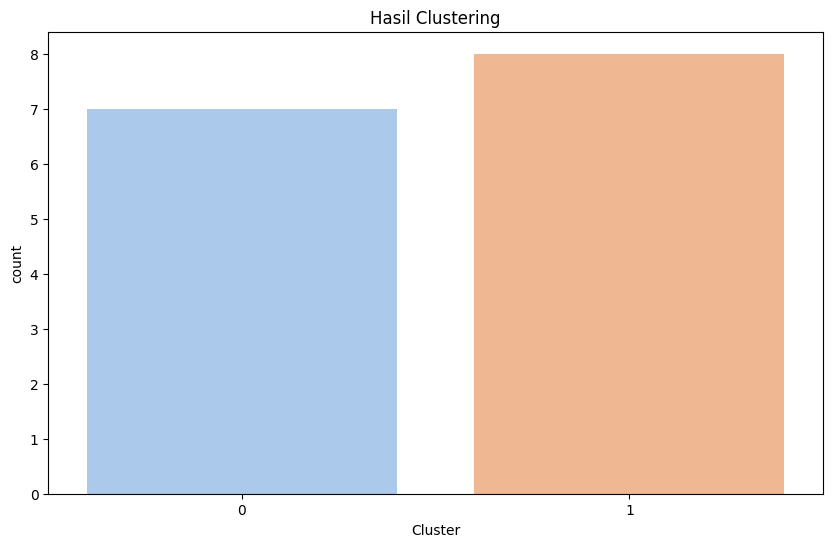

In [14]:
#Menampilkan hasil cluster dalam bentuk diagram batang
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Cluster', data=df, palette='pastel', legend=False)
plt.title('Hasil Clustering')
plt.show()

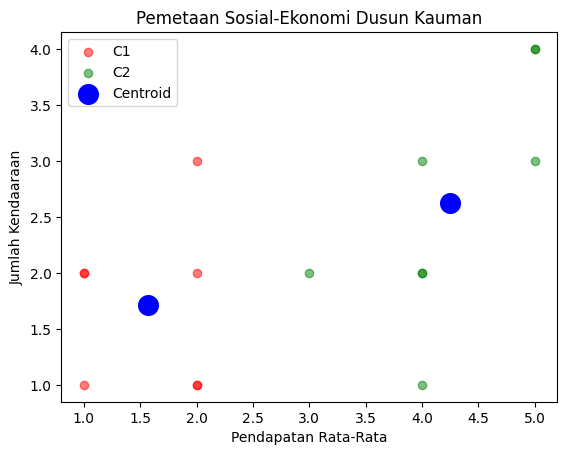

In [15]:
#Menampilkan salah satu plot hasil cluster
K=2

#mendefinisikan cetroid
centroid = kMeans.cluster_centers_

color =['red','green'] #menentukan warna
labels =['C1','C2'] #memberi label pada hasil clustering

for k in range (K):
    plt.scatter(df[df['Cluster']==k]['Pendapatan Rata-Rata'],
                df[df['Cluster']==k]['Jumlah Kendaraan'],
                c=color[k],label=labels[k], alpha=0.5)
#membuat plot centroid
plt.scatter(centroid[:,0], centroid[:,1], s=200, c='blue',label='Centroid')

#membuat plot
plt.xlabel('Pendapatan Rata-Rata')
plt.ylabel('Jumlah Kendaaraan')
plt.title('Pemetaan Sosial-Ekonomi Dusun Kauman')
plt.legend()
plt.show()

<Figure size 1000x1500 with 0 Axes>

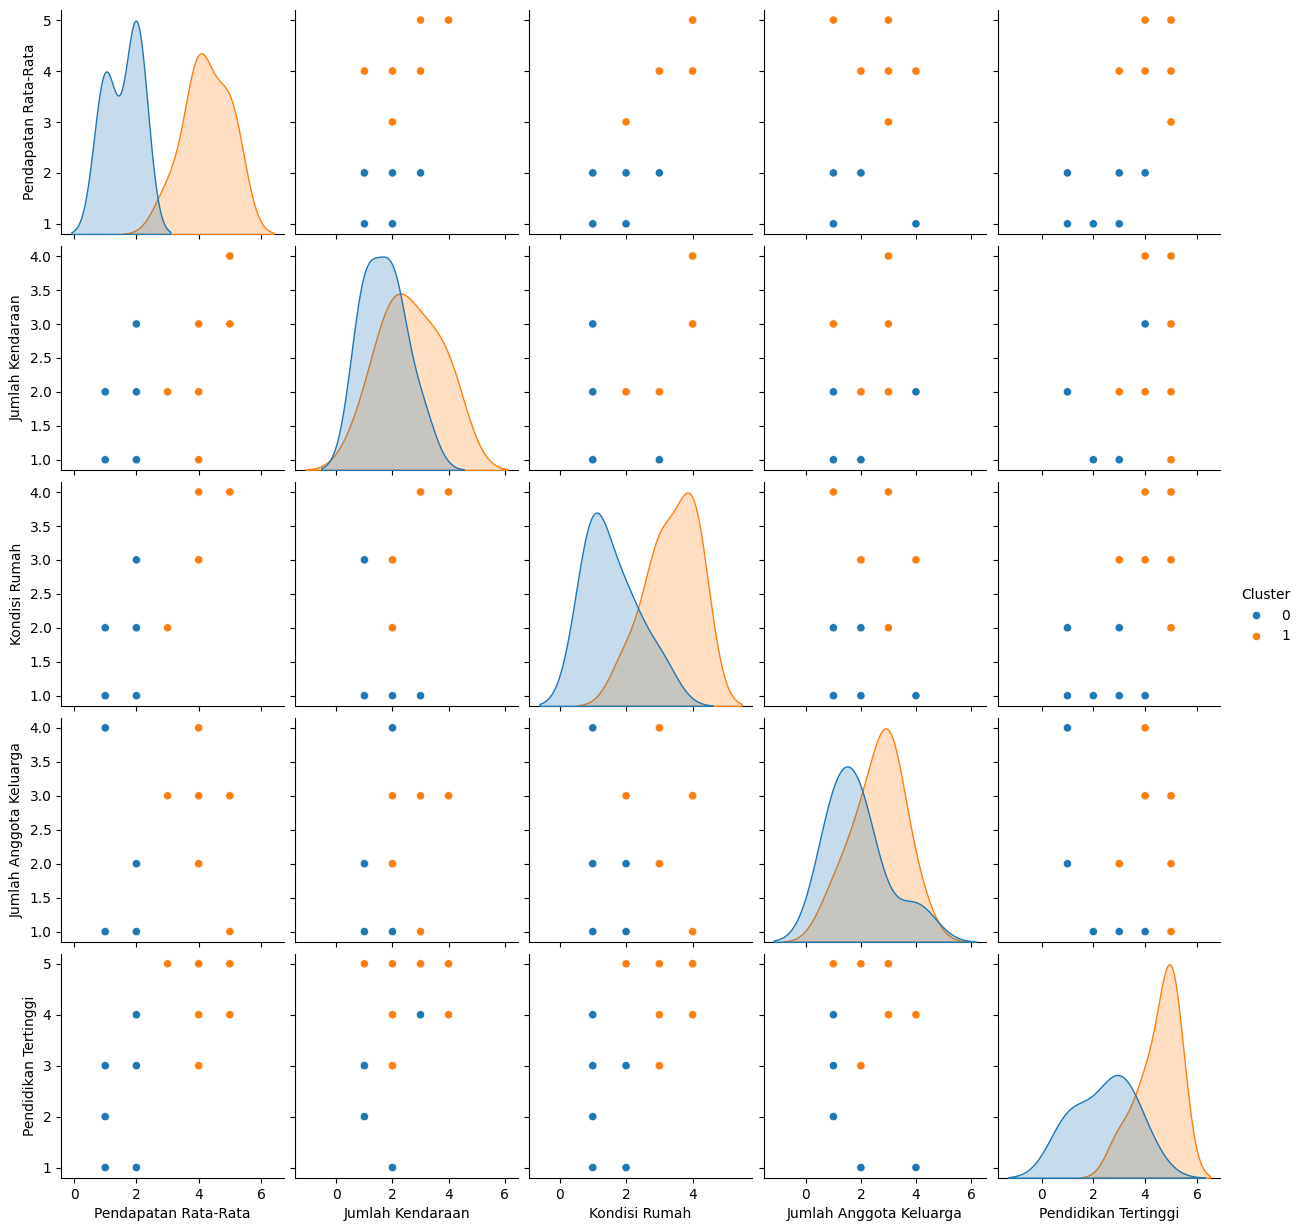

In [16]:
#menmapilkan plot hasil cluster
plt.figure(figsize=(10,15))
sns.pairplot(data=df,hue="Cluster")
plt.show()

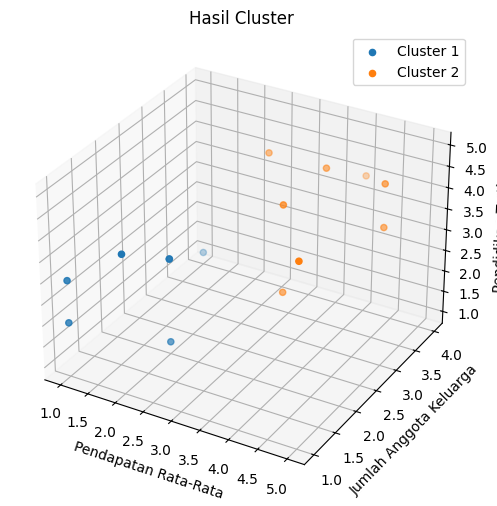

In [17]:
from mpl_toolkits.mplot3d import Axes3D

# Merencanakan plot  3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot sebar untuk setiap cluster
for i in range(2):
    ax.scatter(df[df['Cluster'] == i]['Pendapatan Rata-Rata'], 
               df[df['Cluster'] == i]['Jumlah Anggota Keluarga'], 
               df[df['Cluster'] == i]['Pendidikan Tertinggi'], 
               label=f'Cluster {i+1}')

ax.set_xlabel('Pendapatan Rata-Rata')
ax.set_ylabel('Jumlah Anggota Keluarga')
ax.set_zlabel('Pendidikan Tertinggi')
ax.set_title('Hasil Cluster')

plt.legend()

In [20]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, 2:])

In [21]:
scaler

StandardScaler()

In [22]:
selected_features = scaled_features

In [23]:
selected_features

array([[ 1.27872403,  0.73496842,  1.07863874,  0.93541435],
       [-1.33684785, -1.2694909 ,  0.34320324, -1.06904497],
       [-0.46499055, -1.2694909 , -0.39223227, -1.06904497],
       [-0.46499055, -0.26726124, -1.86310328, -1.06904497],
       [ 0.40686674, -0.26726124,  1.07863874,  0.93541435],
       [ 0.40686674,  1.73719807,  0.34320324,  0.93541435],
       [ 1.27872403,  0.73496842,  0.34320324,  0.93541435],
       [ 1.27872403, -1.2694909 ,  1.07863874,  0.93541435],
       [-1.33684785, -0.26726124, -0.39223227, -1.06904497],
       [-1.33684785, -1.2694909 , -1.12766778, -1.06904497],
       [-0.46499055,  0.73496842,  1.07863874,  0.93541435],
       [ 0.40686674, -0.26726124, -0.39223227, -1.06904497],
       [ 0.40686674, -0.26726124, -0.39223227,  0.93541435],
       [ 1.27872403,  0.73496842,  1.07863874,  0.93541435],
       [-1.33684785,  1.73719807, -1.86310328, -1.06904497]])